In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 13s 1us/step


(60000, 28, 28)

<ipython-input-2-8cba3b7b8c4d>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


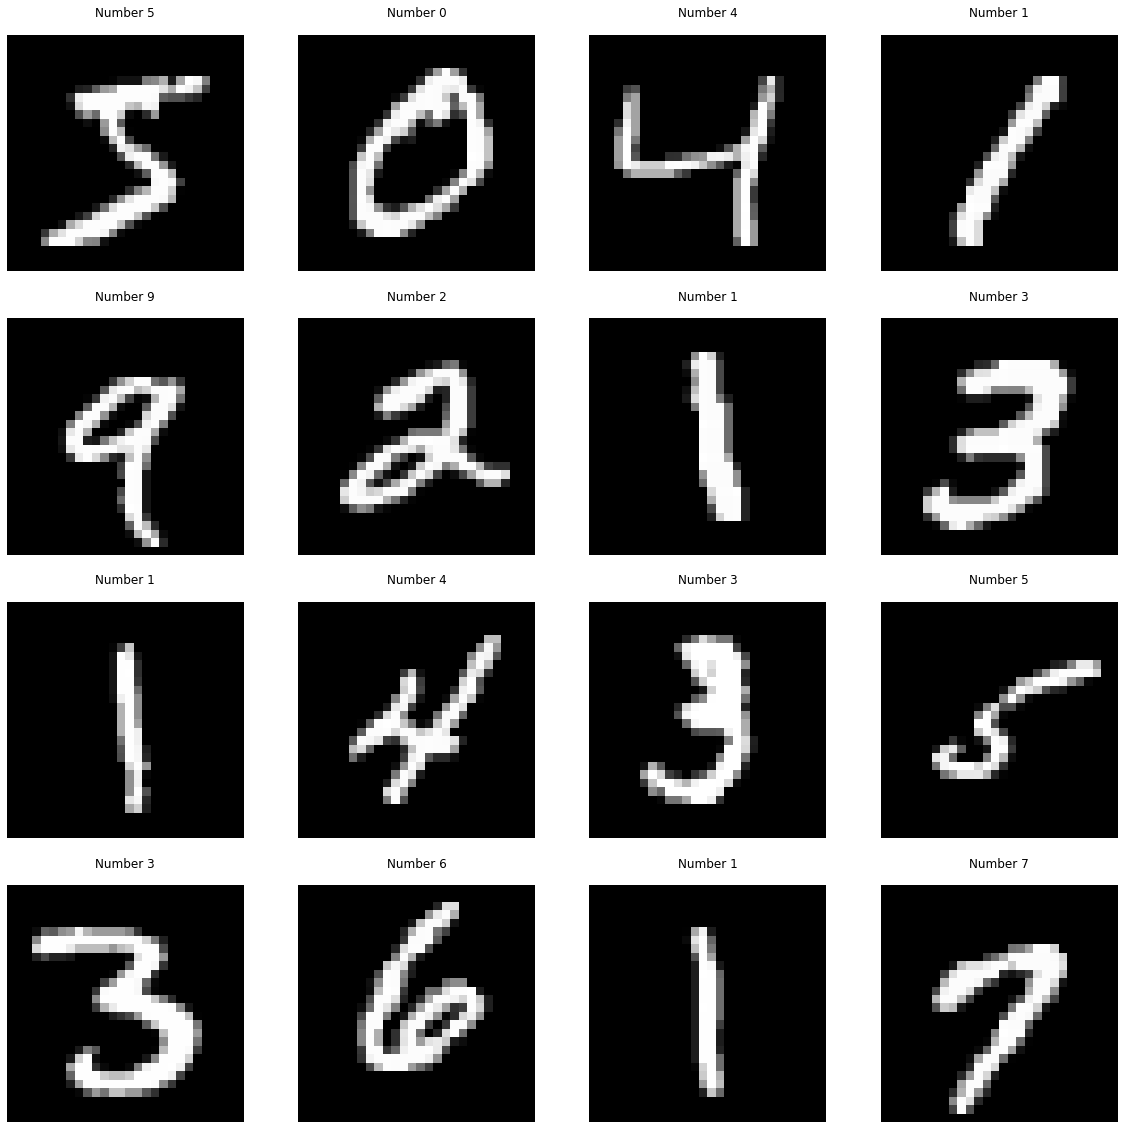

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()



In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0902 - accuracy: 0.9721
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0595 - accuracy: 0.9812
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0440 - accuracy: 0.98530s - loss: 0.0437 - ac
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0353 - accuracy: 0.9885
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0237 - accuracy: 0.9919
Epoch 7/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 8/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0198 - accuracy: 0.9932
Epoch 9/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0173 - accuracy: 0.9944
Epoch 10/15
1875/1875 [====================

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9712


[0.09488152712583542, 0.9711999893188477]